In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import glob
color_list =["#3eb991","#6ecadc","#e9a820","#e01563","#edb196","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]
test_output = pd.DataFrame(pd.read_csv("../data_files/static_output.csv"))

test_output = test_output.transpose()
test_output= test_output.reset_index(level=0)
display(test_output)
test_output = test_output.dropna()
column_name = list(test_output.iloc[0])
column_name = [ i.strip() for i in column_name]
test_output = test_output.drop(index=0)
test_output.columns = column_name
test_output["Tau_n"] = pd.to_numeric(test_output["Tau_n"])
display(test_output)

,index,0,1,2,3,4
0,Tau_n,Tau_M,Tau_H,Inf_n,Inf_M,Inf_H
1,4.77368,0.0270848,,0.0161915,0.000265081,0.998242
2,4.82611,0.028631,NaN,0.017742,0.000305,0.997958
3,4.87841,0.030265,NaN,0.019431,0.000351,0.997628
4,4.93051,0.031993,NaN,0.02127,0.000403,0.997246
...,...,...,...,...,...,...
138,1.10214,0.138434,NaN,0.959021,0.997471,0.000548
139,1.09069,0.136571,NaN,0.95995,0.99764,0.000522
140,1.07946,0.134755,NaN,0.960855,0.997797,0.000496
141,1.06846,0.132986,NaN,0.961735,0.997944,0.000472


,Tau_n,Tau_M,Tau_H,Inf_n,Inf_M,Inf_H
1,4.77368,0.0270848,,0.0161915,0.000265081,0.998242


# Data Processing

# Graph 1
(first 3)

ValueError: x and y must have same first dimension, but have shapes (141,) and (1,)

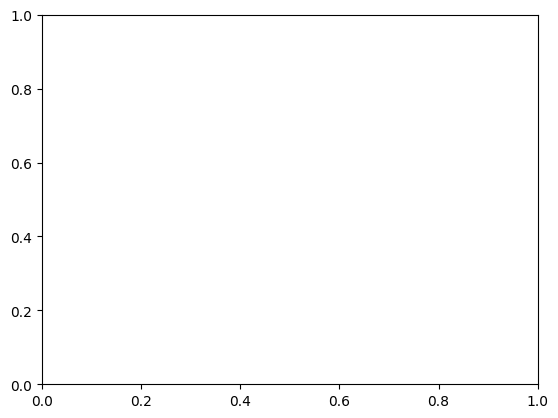

In [7]:
first_3 =list(test_output.columns )[:3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 2

(141,)


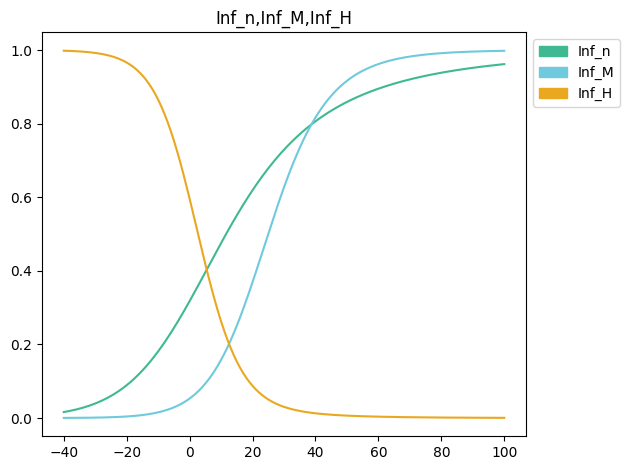

In [ ]:
first_3 = list(test_output.columns)[3:3+3]
fig, ax = plt.subplots()
x = np.arange(-40, 101, step=1)
print(x.shape)

for i in range(3):
    label = first_3[i]
    #ax.scatter(x,test_output[label],color = color_list[i])
    ax.plot(x,test_output[label],color = color_list[i])
    
colorlist = zip(first_3,color_list)
handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
t = ",".join(first_3)
plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()
plt.savefig(f"../graphs/{t}.png")

# Graph 6 Voltages

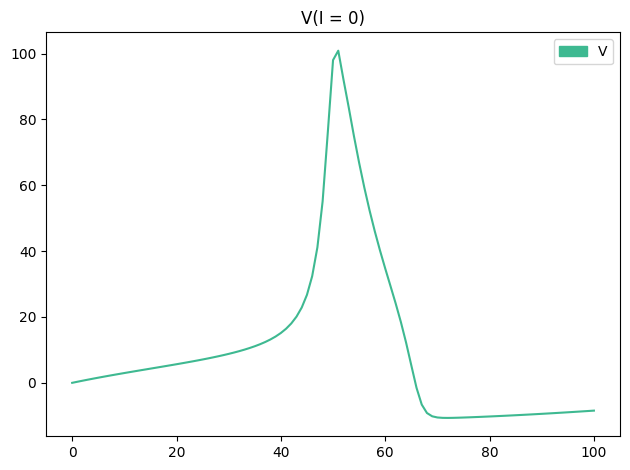

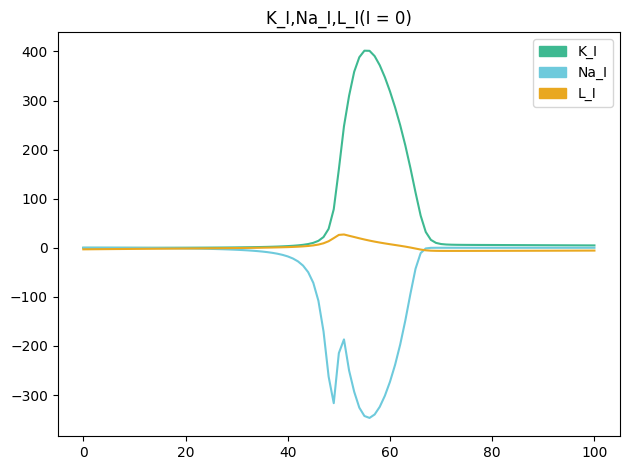

In [ ]:
all_files = glob. glob(f"../data_files/testV_output_*.csv")
for f in all_files:
    voltage = pd.DataFrame(pd.read_csv(f))[:4]

    voltage = voltage.transpose().reset_index(level=0)
    name = str(os.path.basename(f).split(".")[0])
    name = name.split("_")[-1]
    name = f"(I = {name})"

    column =list(voltage.iloc[0])
    column = [ i.strip() for i in column]
    voltage = voltage.dropna()
    voltage = voltage.drop(index=0)
    voltage.columns = column
    issue_col = list(voltage.columns)[0]

    voltage[issue_col] = pd.to_numeric(voltage[issue_col])

    #display(voltage) # this shows the voltage 
    def graph_v_output(i, voltage):
        first_3 =  [list(voltage.columns)[i]]
        fig, ax = plt.subplots()
        size = len(voltage)
        x = np.arange(0,size, step=1)

        for i in range(len(first_3)):
            label = first_3[i]
            #ax.scatter(x,test_output[label],color = color_list[i])
            ax.plot(x,voltage[label],color = color_list[i])
            

        colorlist = zip(first_3,color_list)
        handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
        t = ",".join(first_3) + name
        ax.set_title(t)
        plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
        plt.plot()
        plt.tight_layout()
        plt.savefig(f"../graphs/{t}.png")

    graph_v_output(0, voltage)


    first_3 =  list(voltage.columns)[1:]
    fig, ax = plt.subplots()
    size = len(voltage)
    x = np.arange(0,size, step=1)

    for i in range(len(first_3)):
        label = first_3[i]
        ax.plot(x,voltage[label],color = color_list[i])
        

    colorlist = zip(first_3,color_list)
    handles = [mpatches.Patch(color=colour, label=first_3) for label, colour in colorlist]
    t = ",".join(first_3) + name
    ax.set_title(t)
    plt.legend(handles, first_3, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/{t}.png")